crank-nicolson | N=50 | Runtime = 0.0392 s
crank-nicolson | N=100 | Runtime = 0.0526 s
crank-nicolson | N=200 | Runtime = 0.2653 s
crank-nicolson | N=300 | Runtime = 0.7548 s
split-operator | N=50 | Runtime = 0.0161 s
split-operator | N=100 | Runtime = 0.0523 s
split-operator | N=200 | Runtime = 0.1987 s
split-operator | N=300 | Runtime = 0.2927 s


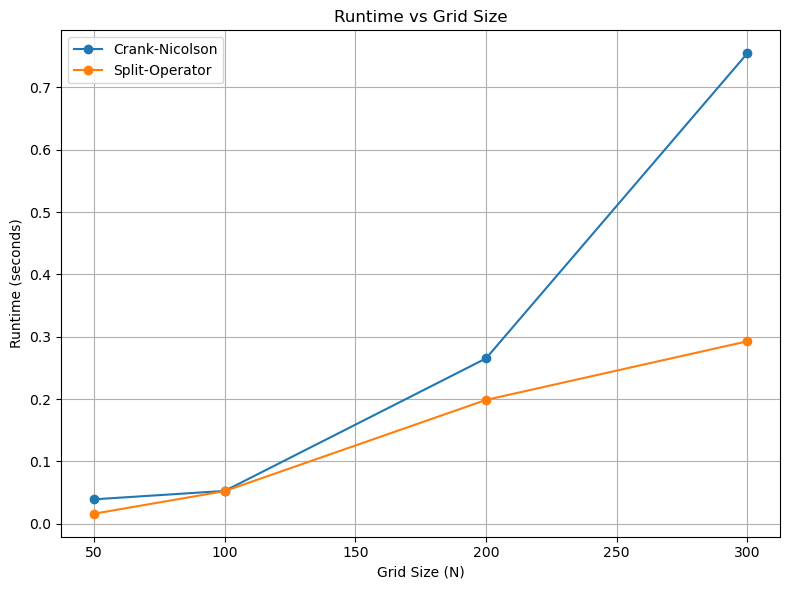

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

import crank_nicolson_double_well as cn
import split_operator_double_well as so

def runtime_vs_grid(method, Ns, dt=0.001, T=0.05):
    runtimes = []
    for N in Ns:
        if method == 'crank-nicolson':
            X, Y, psi, V, D, D_inv, dt, steps = cn.initialize_2d_double_well(N=N, dt=dt, T_total=T)
            start = time()
            for _ in range(steps):
                psi = cn.time_step_crank_nicolson_2d_double(psi, V, D, D_inv, dt)
            end = time()
        elif method == 'split-operator':
            X, Y, Kx, Ky, psi, V, dt, steps = so.initialize_2d_system(N=N, dt=dt, T_total=T)
            start = time()
            for _ in range(steps):
                psi = so.time_step_2d(psi, V, Kx, Ky, dt)
            end = time()
        runtimes.append(end - start)
        print(f"{method} | N={N} | Runtime = {end - start:.4f} s")
    return runtimes

# Grid sizes to test
Ns = [50, 100, 200, 300]

# Run both methods
cn_runtimes = runtime_vs_grid('crank-nicolson', Ns)
so_runtimes = runtime_vs_grid('split-operator', Ns)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Ns, cn_runtimes, 'o-', label='Crank-Nicolson')
plt.plot(Ns, so_runtimes, 'o-', label='Split-Operator')
plt.xlabel('Grid Size (N)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Grid Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
